In [15]:
#import main libraries

import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew
#Configuring floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [16]:
# Load file to dataframe using pandas
# Using column 'row_id' to match train and test files
def load_data(filename):
    df_val = pd.read_csv(filename, index_col=['id'])
    return df_val

In [17]:
# Using function to load data files
filename = './input/train_values.csv'
train = load_data(filename)
filename = './input/test_values.csv'
test = load_data(filename)

In [18]:
# Description of the train variables (33)
print(np.round(train.describe(), 3).T)
np.round(train.describe(), 3).T[['count','mean', 'std', 'min', 'max']].to_csv('summary_var_stats.csv', sep=',')

                                     count       mean        std       min  \
perc_premium_paid_by_cash_credit 79853.000      0.314      0.335     0.000   
age_in_days                      79853.000  18846.697   5208.719  7670.000   
Income                           79853.000 208847.171 496582.597 24030.000   
Count_3-6_months_late            79756.000      0.249      0.691     0.000   
Count_6-12_months_late           79756.000      0.078      0.437     0.000   
Count_more_than_12_months_late   79756.000      0.060      0.312     0.000   
application_underwriting_score   76879.000     99.067      0.740    91.900   
no_of_premiums_paid              79853.000     10.864      5.171     2.000   
premium                          79853.000  10924.508   9401.677  1200.000   
renewal                          79853.000      0.937      0.242     0.000   

                                        25%        50%        75%          max  
perc_premium_paid_by_cash_credit      0.034      0.167      

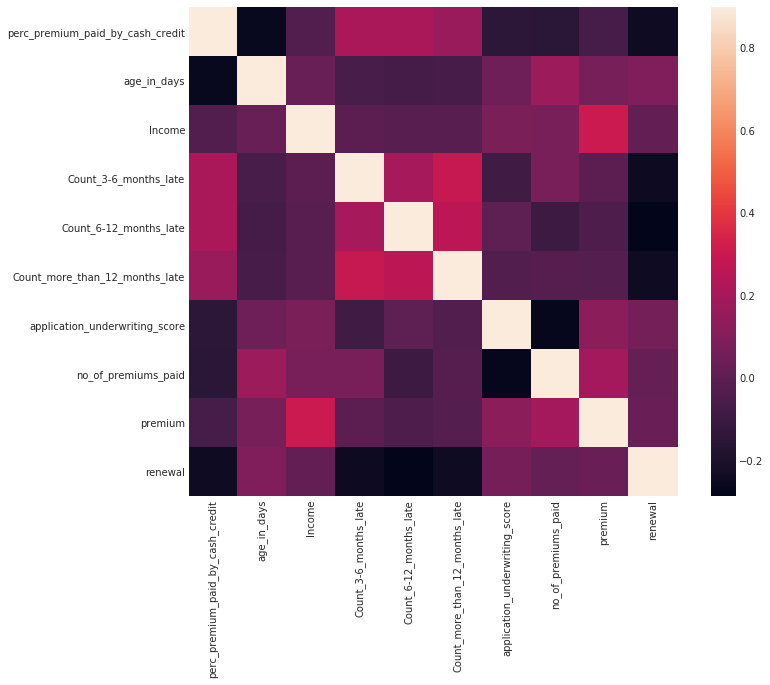

In [19]:
# Visualization of the correlation matrix (corrmatrix)
corrmatrix = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax=0.9, square=True)
plt.show()

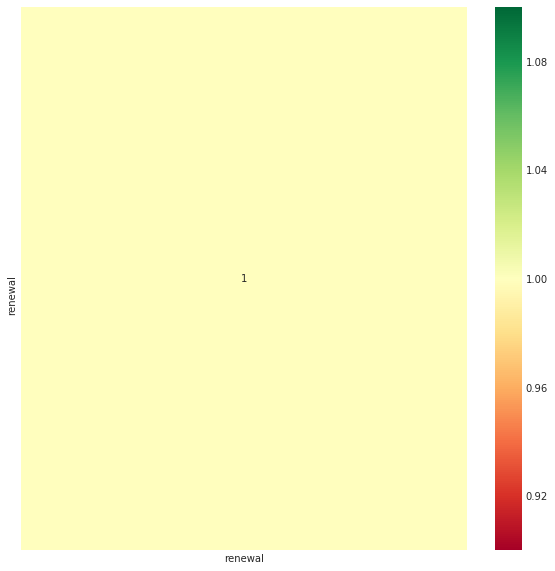

In [20]:
#top correlation feature matrix for |correlation|>0.5
top_corr_features = corrmatrix.index[abs(corrmatrix["renewal"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

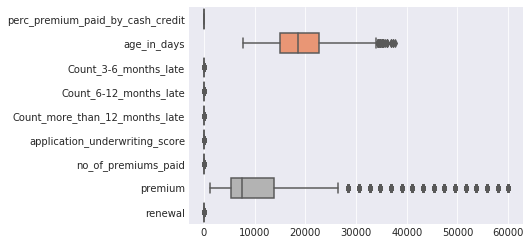

In [21]:
# Box-plot (horizontal) of column-valued variables
cols = ['perc_premium_paid_by_cash_credit', \
        'age_in_days', \
        #'Income', \
        'Count_3-6_months_late', \
        'Count_6-12_months_late', \
        'Count_more_than_12_months_late', \
        'application_underwriting_score', \
        'no_of_premiums_paid', \
        'premium', \
        'renewal'
        ]
ax = sns.boxplot(data=train[cols],orient="h", palette="Set2")
plt.show()

Text(0.5,1,'Number of Non-Renewal (0) vs Renewal(1)')

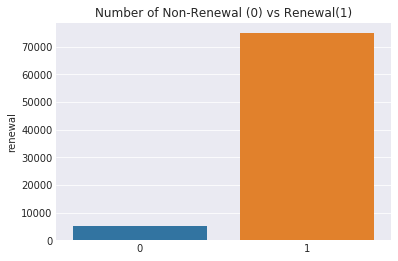

In [22]:
num_renewal = train['renewal'].value_counts()
sns.barplot(x=num_renewal.index, y=num_renewal)
plt.title("Number of Non-Renewal (0) vs Renewal(1)")

In [23]:
numPositives = num_renewal.tolist()[1]
numNegatives = num_renewal.tolist()[0]
totalNumSamples = len(train)
print('Total number of data samples: {}'.format(totalNumSamples))
print('Non-Renewal percentage (%): {0:2.5f}%'.format(numPositives/totalNumSamples*100))
print('Renewal percentage (%): {0:2.5f}%'.format(numNegatives/totalNumSamples*100))

Total number of data samples: 79853
Non-Renewal percentage (%): 6.25900%
Renewal percentage (%): 93.74100%


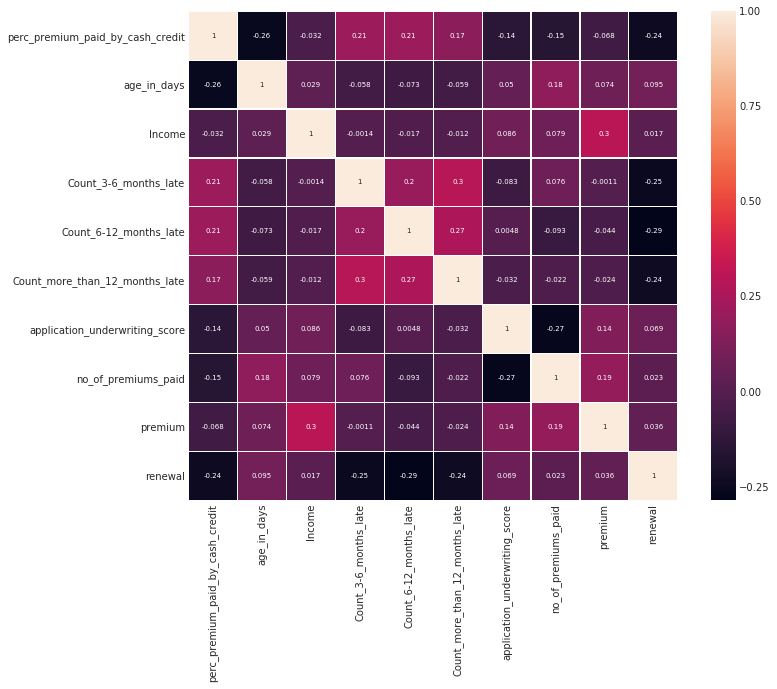

In [24]:
from sklearn.preprocessing import StandardScaler
train['Income'] = StandardScaler().fit_transform(train['Income'].values.reshape(-1, 1))
train['age_in_days'] = StandardScaler().fit_transform(train['age_in_days'].values.reshape(-1, 1))
# Visualization of the correlation matrix (corrmatrix)
corrmatrix = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix,linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True, annot_kws={"size":7})
plt.show()

In [25]:
train.groupby(['sourcing_channel','residence_area_type']).sum()

perc_premium_paid_by_cash_credit  \
sourcing_channel residence_area_type                                     
A                Rural                                        4970.477   
                 Urban                                        7541.272   
B                Rural                                        2149.912   
                 Urban                                        3253.823   
C                Rural                                        1693.221   
                 Urban                                        2522.925   
D                Rural                                        1063.290   
                 Urban                                        1676.734   
E                Rural                                          97.030   
                 Urban                                         128.135   

                                      age_in_days    Income  \
sourcing_channel residence_area_type                          
A                Rural                   2917.778  -941.335   
                 Urban                   4309.308 -1266.498   
B                Rural                     49.248   267.195   
                 Urban                    320.188   226.645   
C                Rural                  -1712.810   220.455   
                 Urban                  -2615.440   485.370   
D                Rural                  -1193.461   273.264   
                 Urban                  -1861.360   643.677   
E                Rural                    -87.460    47.921   
                 Urban                   -125.991    43.306   

                                      Count_3-6_months_late  \
sourcing_channel residence_area_type                          
A                Rural                             3648.000   
                 Urban                             5450.000   
B                Rural                             1731.000   
                 Urban                             2787.000   
C                Rural                             1443.000   
                 Urban                             2172.000   
D                Rural                              928.000   
                 Urban                             1499.000   
E                Rural                               75.000   
                 Urban                              100.000   

                                      Count_6-12_months_late  \
sourcing_channel residence_area_type                           
A                Rural                              1216.000   
                 Urban                              1698.000   
B                Rural                               534.000   
                 Urban                               877.000   
C                Rural                               420.000   
                 Urban                               633.000   
D                Rural                               290.000   
                 Urban                               514.000   
E                Rural                                27.000   
                 Urban                                27.000   

                                      Count_more_than_12_months_late  \
sourcing_channel residence_area_type                                   
A                Rural                                       892.000   
                 Urban                                      1335.000   
B                Rural                                       434.000   
                 Urban                                       640.000   
C                Rural                                       360.000   
                 Urban                                       506.000   
D                Rural                                       212.000   
                 Urban                                       366.000   
E                Rural                                        15.000   
                 Urban                                        26.000   

 

In [26]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['renewal'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (114077, 11)


In [27]:
# Count and rate the missing values in all dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = \
    all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
application_underwriting_score,3.767
Count_more_than_12_months_late,0.112
Count_6-12_months_late,0.112
Count_3-6_months_late,0.112


In [28]:
full_data = [all_data]
for dataset in full_data:
    dataset['Count_more_than_12_months_late'].fillna(0, inplace=True)
    dataset['Count_6-12_months_late'].fillna(0, inplace=True)
    dataset['Count_3-6_months_late'].fillna(0, inplace=True)
    dataset['application_underwriting_score'].fillna( \
        dataset['application_underwriting_score'].median(), inplace=True)

In [29]:
# Count and rate the missing values in all dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = \
    all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
